In [41]:
import sys
import numpy as np
sys.path.insert(0,'/Users/mxd6118/Desktop/DiffSim')
from Plots import *

import pickle
import glob

In [50]:
[print(file_path) for file_path in glob.glob('/Users/mxd6118/Desktop/GAN/bin/testers/*.pickle')]

/Users/mxd6118/Desktop/GAN/bin/testers/data_tested_D_S_parameters_5_asymmetric.pickle
/Users/mxd6118/Desktop/GAN/bin/testers/data_tested_D_S_parameters_0_asymmetric.pickle
/Users/mxd6118/Desktop/GAN/bin/testers/data_tested_trained_params.pickle


[None, None, None]

In [55]:
pickle_obj = open("/Users/mxd6118/Desktop/GAN/bin/testers/data_tested_trained_params.pickle", "rb")
data = pickle.load(pickle_obj)

In [56]:
data['real_batch'].keys()

dict_keys(['energy_deposits', 'S1Pmt', 'S2Si', 'S2Pmt', 'time'])

In [57]:
np.where(data['fake_sipms'])

(array([0, 0, 0, ..., 9, 9, 9]),
 array([15, 15, 15, ..., 37, 37, 37]),
 array([10, 10, 10, ..., 15, 16, 16]),
 array([473, 474, 475, ..., 159, 157, 159]))

In [58]:
mask = np.where(data['real_batch']['S2Si'])

np.mean(data['real_batch']['S2Si'][mask] - data['fake_sipms'][mask])

Array(-1.081981, dtype=float32)

9


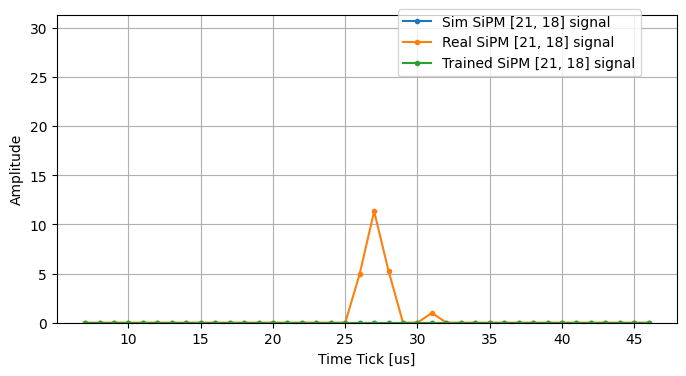

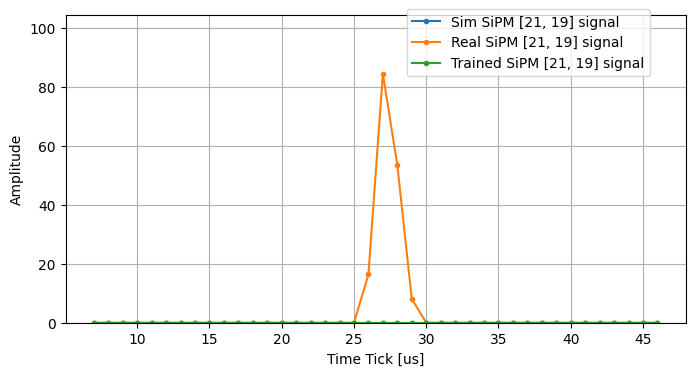

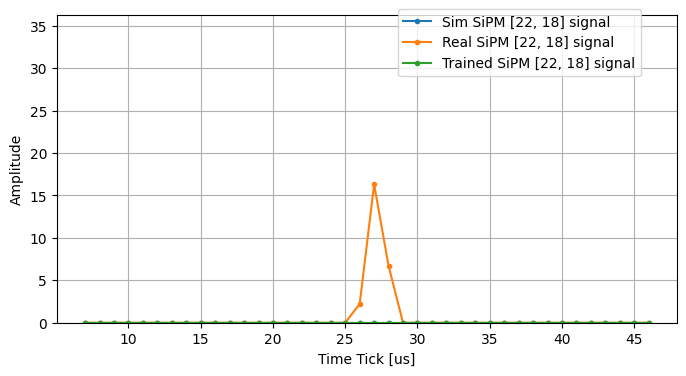

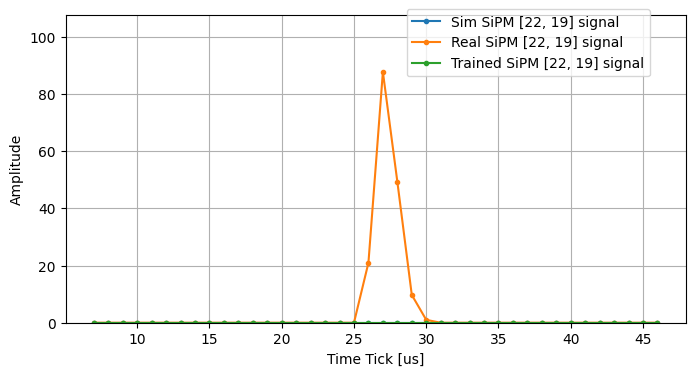

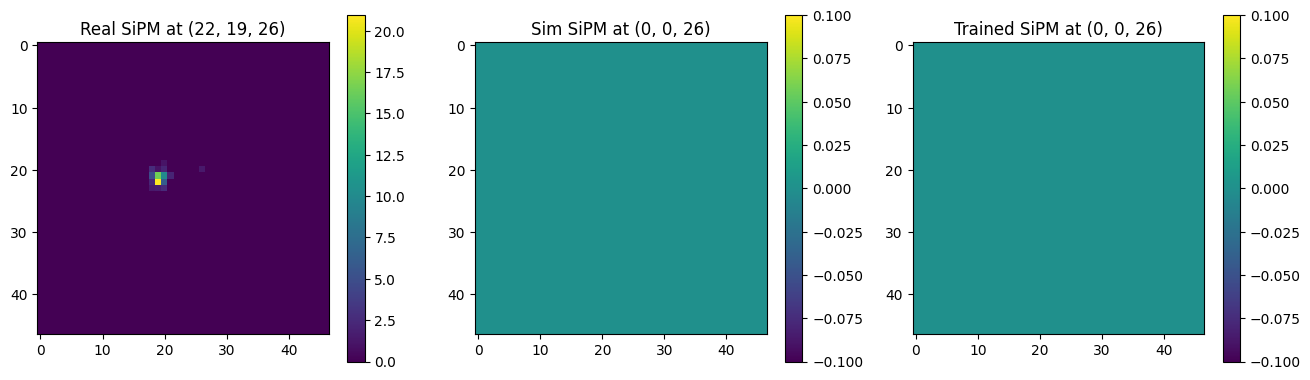

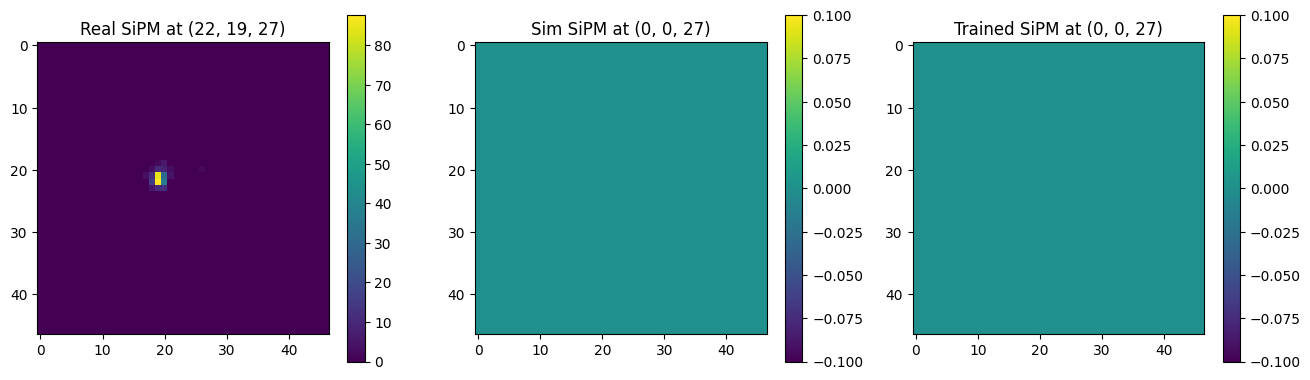

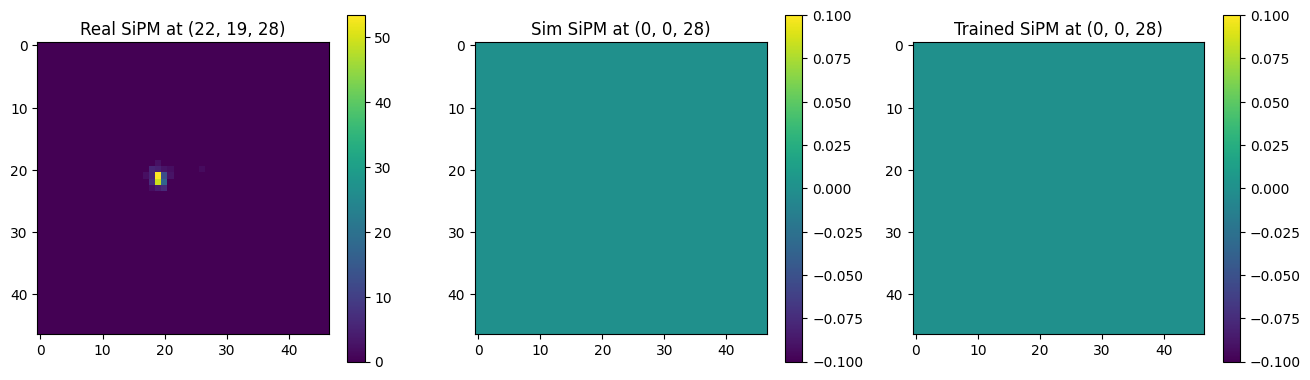

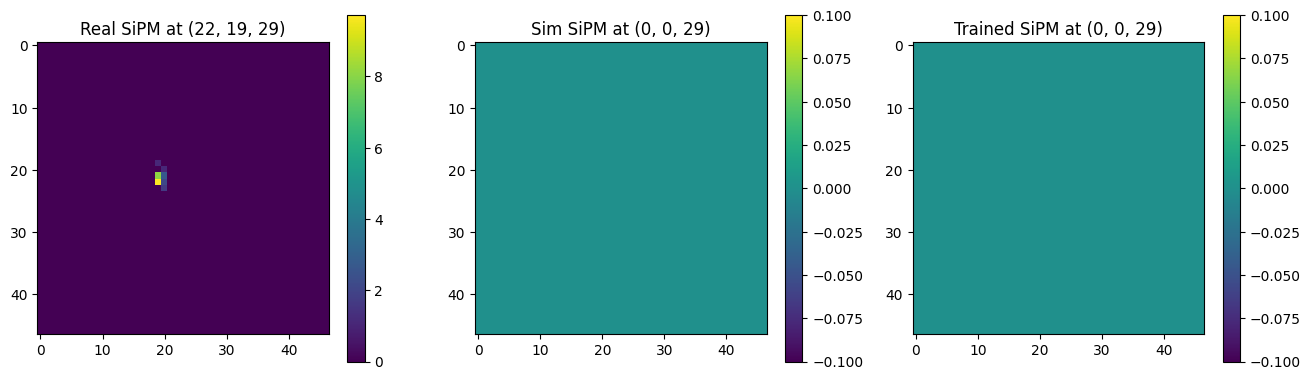

In [16]:
n = np.random.randint(0,len(data['real_batch']['S2Si'])) 
print(n)

plot_error('SiPM',np.zeros(shape = data['real_batch']['S2Pmt'][n].shape),
           np.zeros(shape = data['real_batch']['S2Pmt'][n].shape),data['real_batch']['S2Pmt'][n],
           data['fake_sipms'][n],np.zeros(shape = data['real_batch']['S2Si'][n].shape),
               data['real_batch']['S2Si'][n])
plt.show()

In [17]:
max_value = np.max(data['real_batch']['S2Si'][n])
max_x, max_y, max_z = np.unravel_index(np.argmax(data['real_batch']['S2Si'][n]), 
                                      data['real_batch']['S2Si'][n].shape)

for i_x in range(0,47):
    for i_y in range(0,47):
            
        if len(np.unique(data['fake_sipms'][n][i_x,i_y])) != 1:

            start = max_z - 20
            end = max_z + 20
            x_ticks = np.arange(550)

            plt.plot(x_ticks[start:end], data['real_batch']['S2Si'][n][i_x,i_y][start:end],
                               label=f"Real SiPM [{i_x}, {i_y}] signal",marker='.')
        
            plt.plot(x_ticks[start:end], data['fake_sipms'][n][i_x,i_y][start:end],
                                   label=f"Trained SiPM [{i_x}, {i_y}] signal",marker='.')
            plt.legend(fontsize=7.5)
        plt.show()